In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings 

In [2]:
warnings.filterwarnings('ignore')

In [3]:
column_names=["user_id","item_id","rating","time_strap"]
df=pd.read_csv("u.data", sep="\t",names=column_names)


In [4]:
df.tail()

,user_id,item_id,rating,time_strap
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [5]:
movie_names=pd.read_csv("u.item", sep='\|', header=None)
movie_names=movie_names[[0,1]]
movie_names.columns=["item_id","Movie_title"]

movie_names.head()


df=pd.merge(df,movie_names, on="item_id" )
df.head()

,user_id,item_id,rating,time_strap,Movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [12]:

df.groupby('Movie_title').mean()["rating"].sort_values(ascending=False)
df.groupby('Movie_title').count()['rating'].sort_values(ascending=False)

Movie_title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [18]:
ratings=pd.DataFrame(df.groupby('Movie_title').mean()["rating"])
ratings["no of ratings"]=pd.DataFrame(df.groupby('Movie_title').count()['rating'])
ratings


,rating,no of ratings
Movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [24]:
ratings.sort_values(by= 'rating', ascending=False)

,rating,no of ratings
Movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


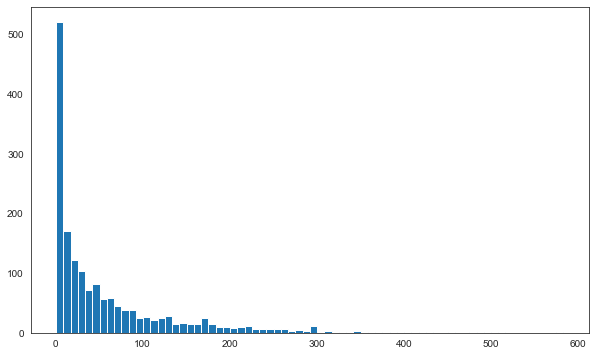

In [30]:
import seaborn as sns
sns.set_style("white")

plt.figure(figsize=(10,6))
plt.hist(ratings['no of ratings'],bins=70)

plt.show()

In [36]:
moviemat=df.pivot_table(index="user_id",columns="Movie_title", values="rating")
ratings.sort_values("no of ratings",ascending=False)


,rating,no of ratings
Movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [90]:

star_wars_user_ratings=moviemat["Star Wars (1977)"]
similar_to_starwars=moviemat.corrwith(star_wars_user_ratings)

corr_starwars=pd.DataFrame(similar_to_starwars,columns=["Correlation"])


corr_starwars.dropna(inplace=True)

dataf=pd.merge(ratings,corr_starwars, on="Movie_title")

dataf.sort_values("Correlation",ascending=False).head(10)

dataf[dataf["no of ratings"]>100].sort_values("Correlation",ascending=False).head(10)



,rating,no of ratings,Correlation
Movie_title,,,
Star Wars (1977),4.358491,583,1.000000
"Empire Strikes Back, The (1980)",4.204360,367,0.747981
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433
"Sting, The (1973)",4.058091,241,0.367538
Indiana Jones and the Last Crusade (1989),3.930514,331,0.350107
Pinocchio (1940),3.673267,101,0.347868
"Frighteners, The (1996)",3.234783,115,0.332729


In [96]:

def predict(movie_name):
    movie_rating=moviemat[movie_name]
    movie_corr=moviemat.corrwith(movie_rating)
    
    df1=pd.DataFrame(movie_corr,columns=["Correlation"])
    df1.dropna(inplace=True)
    
    df2=pd.merge(df1,ratings, on="Movie_title")
    ans=df2[df2["no of ratings"]>100].sort_values("Correlation",ascending=False)
    
    return ans
    

In [99]:
predict("Star Wars (1977)").head(10)

,Correlation,rating,no of ratings
Movie_title,,,
Star Wars (1977),1.000000,4.358491,583
"Empire Strikes Back, The (1980)",0.747981,4.204360,367
Return of the Jedi (1983),0.672556,4.007890,507
Raiders of the Lost Ark (1981),0.536117,4.252381,420
Austin Powers: International Man of Mystery (1997),0.377433,3.246154,130
"Sting, The (1973)",0.367538,4.058091,241
Indiana Jones and the Last Crusade (1989),0.350107,3.930514,331
Pinocchio (1940),0.347868,3.673267,101
"Frighteners, The (1996)",0.332729,3.234783,115
